 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
# Importing necessary libraries and executables
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
# Formatting the data so it can be read
whale_csvpath = Path("Resources\whale_returns.csv") #formatting the data so it can be read
whale_returns_df = pd.read_csv(whale_csvpath, infer_datetime_format=True, parse_dates=True, index_col='Date')

In [3]:
# Count nulls
whale_returns_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_returns_csvpath = Path("Resources/algo_returns.csv") #formatting the data so it can be read
algo_returns_df = pd.read_csv(algo_returns_csvpath, infer_datetime_format=True, parse_dates=True, index_col='Date')

In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csvpath = Path("Resources/sp_tsx_history.csv") #formatting the data so it can be read
sp_tsx_history_df = pd.read_csv(sp_tsx_history_csvpath, parse_dates=True, infer_datetime_format=True, index_col='Date')

In [9]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# Utilising replace and astype function to clean the data from sp tsx
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(r'$', '')
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(r',', '')
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].astype(float)
sp_tsx_history_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_9192\3211556271.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(r'$', '')


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [11]:
# Calculate Daily Returns
# Utilising pandas functions to calculate daily returns
sp_tsx_history_daily_returns_df = sp_tsx_history_df.pct_change()
sp_tsx_history_daily_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [12]:
# Drop nulls
sp_tsx_history_df.dropna(inplace=True)

In [13]:
# Rename `Close` Column to be specific to this portfolio.
# Utilising pandas function to rename a column in "SP_TSX_CLOSE" for readability.
sp_tsx_history_df = sp_tsx_history_df.rename(columns={
    "Close": "SP_TSX_Close"
})

sp_tsx_history_df.head()

,SP_TSX_Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
# concatenating the datasets with each ticker being a individual column to create a single dataframe for reference.
combined_df = pd.concat([algo_returns_df, whale_returns_df, sp_tsx_history_daily_returns_df], axis = "columns", join= "inner")
combined_df.sort_index(inplace=True)
combined_df = combined_df.rename(columns={
    "Close": "SP_TSX_CLOSE"
})

combined_df

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP_TSX_CLOSE
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.008530
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.003371
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001344
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.009972
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,0.000682,-0.007247,-0.000285,-0.001291,-0.005153,0.004848,-0.000628
2019-04-26,0.002981,0.005256,0.008149,0.009162,0.012355,0.010434,0.002254
2019-04-29,0.005208,0.002829,0.001254,0.002719,0.006251,0.005223,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

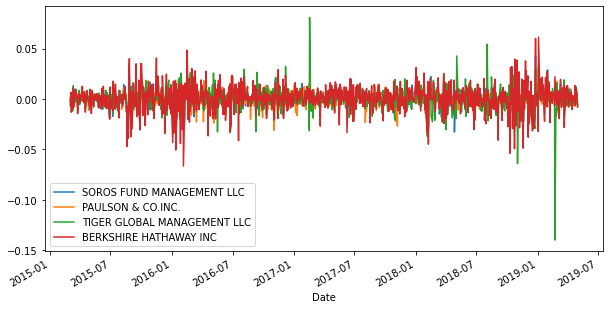

In [15]:
# Plot daily returns of all portfolios
whale_returns_df.plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

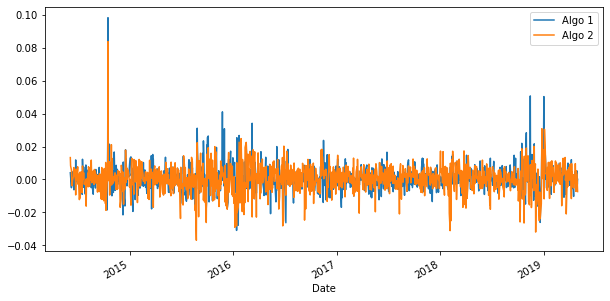

In [16]:
algo_returns_df.plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

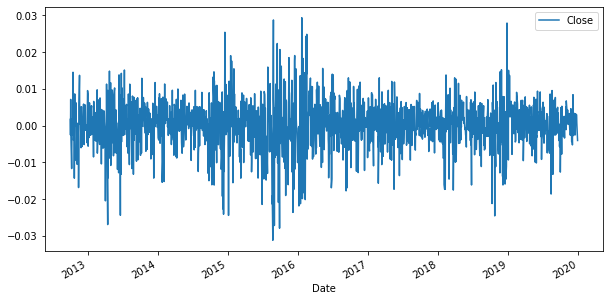

In [17]:
sp_tsx_history_daily_returns_df.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

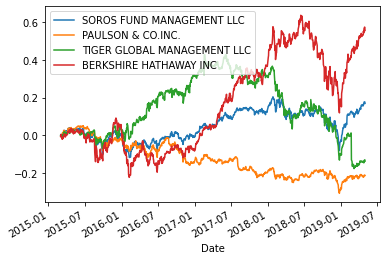

In [18]:
# Calculate cumulative returns of all portfolios
# In this section we have taken advantage of cumprod and plot to cumulate data and visualise it accordingly.
whale_cumulative_returns = (1 + whale_returns_df).cumprod() - 1
whale_cumulative_returns.plot()

<AxesSubplot:xlabel='Date'>

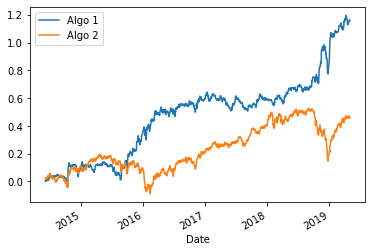

In [19]:
algo_cumulative_returns = (1 + algo_returns_df).cumprod() - 1
algo_cumulative_returns.plot()

<AxesSubplot:xlabel='Date'>

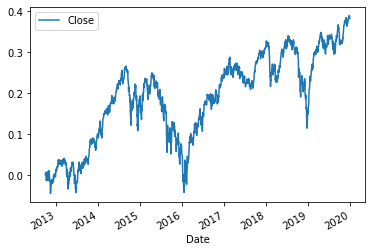

In [20]:
sp_tsx_cumulative_returns = (1 + sp_tsx_history_daily_returns_df).cumprod() - 1
sp_tsx_cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


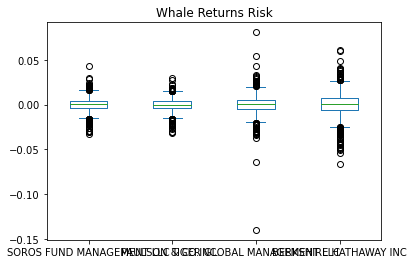

In [21]:
# Box plot to visually show risk
# In this section we use a different plot method to show individual portfolio returns in a 'box' plot.
whale_returns_risk = whale_returns_df.plot(kind='box', title='Whale Returns Risk')

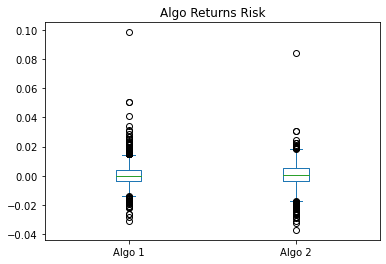

In [22]:
algo_returns_risk = algo_returns_df.plot(kind='box', title='Algo Returns Risk')

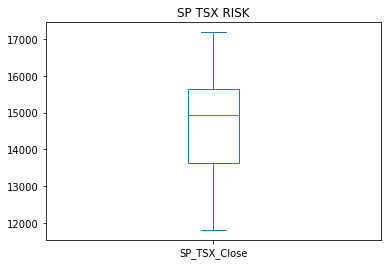

In [23]:
sp_tsx_history_risk = sp_tsx_history_df.plot(kind='box', title='SP TSX RISK')

### Calculate Standard Deviations

In [24]:
# Calculate the daily standard deviations of all portfolios
# Utilising Pandas with '.std' we calculate standard deviation of each portfolio provided.
whale_returns_std = whale_returns_df.std()
algo_returns_std = algo_returns_df.std()
sp_tsx_history_std = sp_tsx_history_daily_returns_df.std()

### Determine which portfolios are riskier than the S&P TSX 60

In [25]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_history_std = sp_tsx_history_daily_returns_df['Close'].std()
# Determine which portfolios are riskier than the S&P TSX 60
combined_df.std()> sp_tsx_history_std
# Here we have determined that all portfolios are riskier than SP_TSX_60

Algo 1                         True
Algo 2                         True
SOROS FUND MANAGEMENT LLC      True
PAULSON & CO.INC.              True
TIGER GLOBAL MANAGEMENT LLC    True
BERKSHIRE HATHAWAY INC         True
SP_TSX_CLOSE                   True
dtype: bool

### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
# Utilising the square root function we can calcualte annuazized standard deviation
# by applying the sqrt function with the 252 trading days in a year.
whale_returns_annualized_std = whale_returns_std * np.sqrt(252)
algo_returns_anuualized_std = algo_returns_std * np.sqrt(252)
sp_tsx_history_annualized_std = sp_tsx_history_std * np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

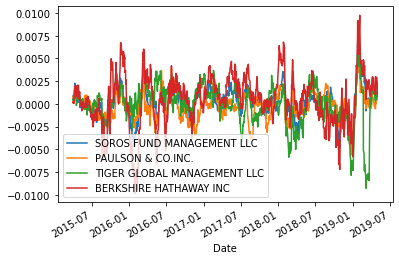

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Utilising roling function and mean to calculate and plot results.
whale_returns_df.rolling(window=21).mean()
# Plot the rolling standard deviation
whale_returns_df.rolling(window=21).mean().plot()

<AxesSubplot:xlabel='Date'>

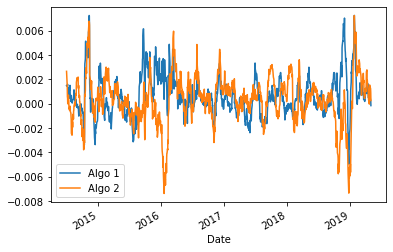

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Utilising roling function and mean to calculate and plot results.
algo_returns_df.rolling(window=21).mean()
# Plot the rolling standard deviation
algo_returns_df.rolling(window=21).mean().plot()

### Calculate and plot the correlation

<AxesSubplot:xlabel='Date'>

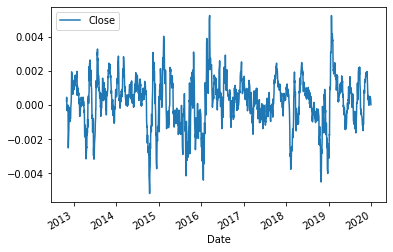

In [29]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Utilising roling function and mean to calculate and plot results.
sp_tsx_history_daily_returns_df.rolling(window=21).mean()
# Plot the rolling standard deviation
sp_tsx_history_daily_returns_df.rolling(window=21).mean().plot()

<AxesSubplot:>

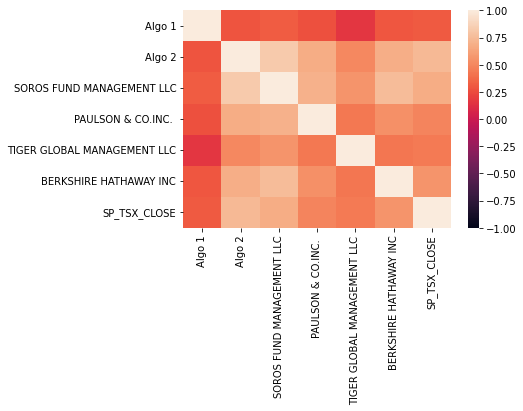

In [30]:
# Calculate the correlation
# With seaborn and the '.corr' function we calcualte correlation and plot with a sea map.
price_correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

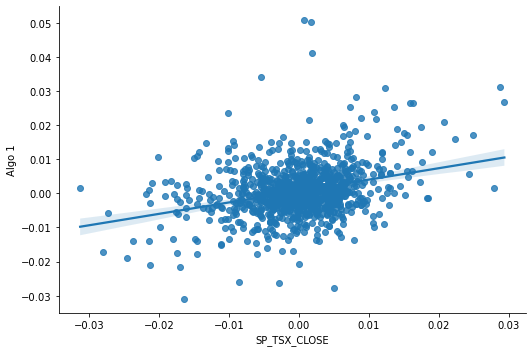

In [31]:
# Calculate covariance of a single portfolio
# Here we use the data provided to to calculate variance, covariance and then beta
# This is done so that we can visualize that data with implot to plot the beta trend.
covariance = combined_df['SP_TSX_CLOSE'].cov(combined_df['Algo 1'])
# Calculate variance of S&P TSX
sp_tsx_variance = combined_df['SP_TSX_CLOSE'].var()
# Computing beta
sp_tsx_algo1_beta = covariance / sp_tsx_variance
# Plot beta trend
sns.lmplot(x='SP_TSX_CLOSE', y='Algo 1', data=combined_df, aspect=1.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

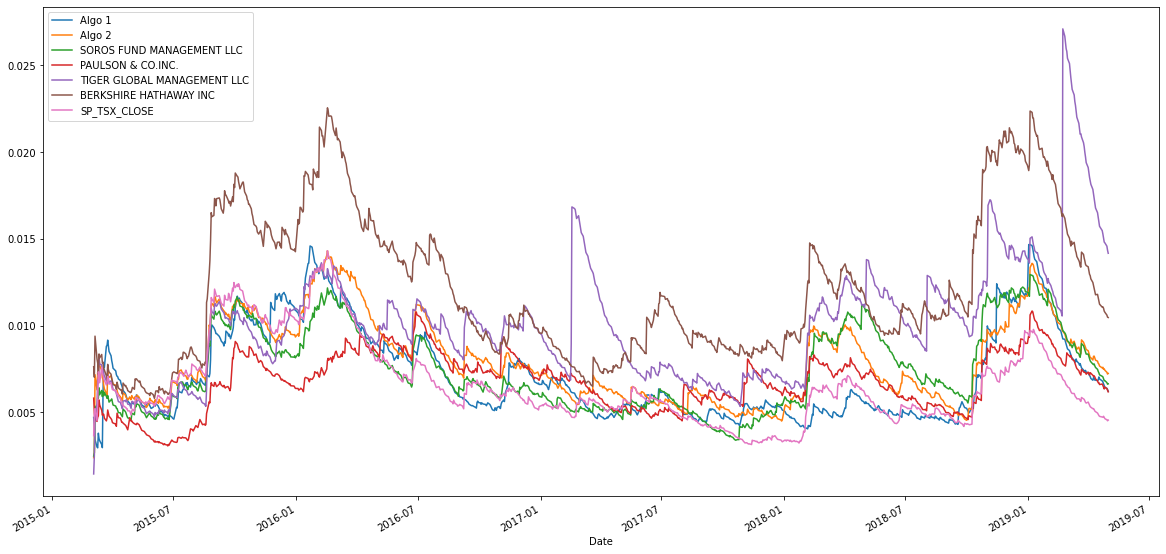

In [32]:
# Use `ewm` to calculate the rolling window
# Applying the halflife to to the standard deviation to calculate 21 day half life and plot results.
ewm_combined_df = combined_df.ewm(halflife=21).std()
ewm_combined_df.plot(figsize=(20, 10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [33]:
# Annualized Sharpe Ratios
# Using mathematic equations we determine sharpe ratios.
sharpe_ratios = ((combined_df.mean()) * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

Algo 1                         1.491514
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
SP_TSX_CLOSE                   0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

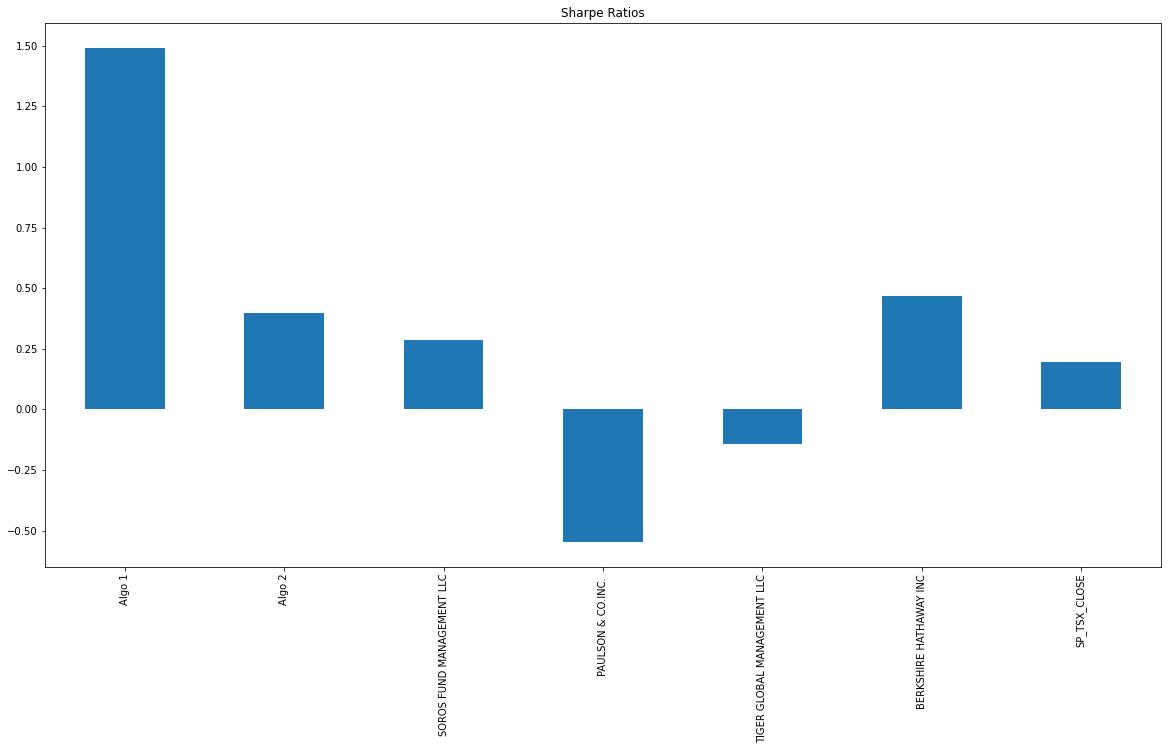

In [34]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(figsize=(20,10), kind='bar', title = 'Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Algo 1 outperformed all other portfolios with a Sharpe Ratio of 1.5,
while Algo 2 outperformed all but Algo 1 and Berkshire Hathaway it only
had a ratio of 0.35.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [35]:
# Reading data from 1st stock\
# Importing of a new csv file pulled from google sheets and google finance customised
# accordingly to create a path that will be used in a custom portfolio.
googlefinance_csvpath = Path("Resources\googlefinance.csv")
googlefinance_returns_df = pd.read_csv(googlefinance_csvpath, infer_datetime_format=True, parse_dates=True, index_col='Date')
googlefinance_returns_df = googlefinance_returns_df.rename(columns={
    "Close": "GOOG"
})
googlefinance_returns_df.head();

In [36]:
# Reading data from 2nd stock
# Importing of a new csv file pulled from google sheets and google finance customised
# accordingly to create a path that will be used in a custom portfolio.
nvidia_csvpath = Path("Resources/nvidia.csv")
nvidia_returns_df = pd.read_csv(nvidia_csvpath, infer_datetime_format=True, parse_dates=True, index_col='Date')
nvidia_returns_df = nvidia_returns_df.rename(columns={
    "Close": "NVDA"
})
nvidia_returns_df.head();

In [37]:
# Reading data from 3rd stock
# Importing of a new csv file pulled from google sheets and google finance customised
# accordingly to create a path that will be used in a custom portfolio.
microsoft_csvpath = Path("Resources\microsoft.csv")
microsoft_returns_df = pd.read_csv(microsoft_csvpath, infer_datetime_format=True, parse_dates=True, index_col='Date')
microsoft_returns_df = microsoft_returns_df.rename(columns={
    "Close": "MSFT"
})
microsoft_returns_df.head();

In [38]:
# Combine all stocks in a single DataFrame
# Creating a combined dataframe for the custom portfolio files.
custom_combined_df = pd.concat([googlefinance_returns_df, nvidia_returns_df, microsoft_returns_df], axis = "columns", join = "inner")
custom_combined_df.sort_index(inplace=True)
custom_combined_df

,GOOG,NVDA,MSFT
Date,,,
2014-01-02,556.55,3.97,37.16
2014-01-03,552.50,3.92,36.91
2014-01-06,558.66,3.97,36.13
2014-01-07,569.42,4.04,36.41
2014-01-08,570.61,4.09,35.76
...,...,...,...
2018-12-21,979.54,32.39,98.23
2018-12-24,976.22,31.77,94.13
2018-12-26,1039.46,33.28,100.56


In [39]:
# Reset Date index
# Resetting the index for readability.
custom_combined_df.reset_index()

,Date,GOOG,NVDA,MSFT
0,2014-01-02,556.55,3.97,37.16
1,2014-01-03,552.50,3.92,36.91
2,2014-01-06,558.66,3.97,36.13
3,2014-01-07,569.42,4.04,36.41
4,2014-01-08,570.61,4.09,35.76
...,...,...,...,...
1252,2018-12-21,979.54,32.39,98.23
1253,2018-12-24,976.22,31.77,94.13
1254,2018-12-26,1039.46,33.28,100.56
1255,2018-12-27,1043.88,32.79,101.18


In [40]:
# Reorganize portfolio data by having a column per symbol
# There is a column for each portfolio in the custom_combined_df with there relevant symbol already.

In [41]:
# Calculate daily returns
custom_combined_df_daily_returns = custom_combined_df.pct_change()
# Drop NAs
custom_combined_df_daily_returns.dropna(inplace = True)
# Display sample data
custom_combined_df_daily_returns

,GOOG,NVDA,MSFT
Date,,,
2014-01-03,-0.007277,-0.012594,-0.006728
2014-01-06,0.011149,0.012755,-0.021132
2014-01-07,0.019260,0.017632,0.007750
2014-01-08,0.002090,0.012376,-0.017852
2014-01-09,-0.009621,-0.036675,-0.006432
...,...,...,...
2018-12-21,-0.029592,-0.041149,-0.032312
2018-12-24,-0.003389,-0.019142,-0.041739
2018-12-26,0.064780,0.047529,0.068310


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Set weights
# Here we set weights and used this to calculate the weigthed returns of the custom portfolio.
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
custom_combined_df_weighted_returns = custom_combined_df_daily_returns.dot(weights)
# Display sample data
custom_combined_df_weighted_returns.head()

Date
2014-01-03   -0.008866
2014-01-06    0.000924
2014-01-07    0.014881
2014-01-08   -0.001129
2014-01-09   -0.017576
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame
# Using concatenation to combine both the older combined portfolio and the new custom portfolio.
combined_df['custom'] = custom_combined_df_weighted_returns
combined_df.sort_index(inplace=True)

In [44]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df.dropna(inplace=True)
combined_df

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP_TSX_CLOSE,custom
Date,,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.008530,-0.009118
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.003371,0.001752
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001344,0.008060
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.009972,-0.014888
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,-0.006555,0.005130
...,...,...,...,...,...,...,...,...
2018-12-20,-0.026095,-0.023793,-0.016673,-0.008347,-0.011045,-0.025463,-0.008573,-0.019621
2018-12-21,-0.017888,-0.021636,-0.022720,-0.020980,-0.022570,-0.028892,-0.014590,-0.034351
2018-12-24,-0.003938,-0.014745,-0.019152,-0.011786,-0.029165,-0.020181,-0.011141,-0.021423


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized `std`
risk = combined_df.std()
annualized_risk = combined_df * np.sqrt(252)
annualized_risk

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP_TSX_CLOSE,custom
Date,,,,,,,,
2015-03-03,-0.030830,-0.015073,-0.020089,-0.079063,-0.007866,-0.104274,-0.135407,-0.144742
2015-03-04,-0.136343,0.038356,0.035399,0.051454,-0.040226,0.066880,-0.053506,0.027810
2015-03-05,-0.015161,0.068628,0.063752,0.064705,0.037379,0.106777,0.021334,0.127945
2015-03-06,-0.078686,-0.181927,-0.125494,-0.056736,-0.134634,-0.207925,-0.158302,-0.236342
2015-03-09,-0.086469,0.020688,0.009243,0.067076,0.092751,-0.026232,-0.104054,0.081434
...,...,...,...,...,...,...,...,...
2018-12-20,-0.414247,-0.377701,-0.264672,-0.132508,-0.175337,-0.404215,-0.136097,-0.311476
2018-12-21,-0.283956,-0.343454,-0.360664,-0.333041,-0.358281,-0.458652,-0.231611,-0.545301
2018-12-24,-0.062511,-0.234069,-0.304034,-0.187096,-0.462985,-0.320363,-0.176852,-0.340084


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

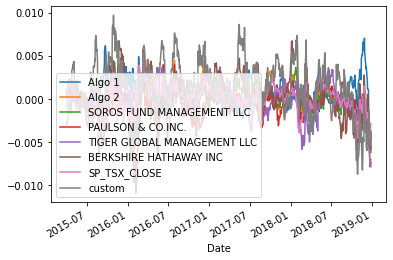

In [46]:
# Calculate rolling standard deviation
combined_df.rolling(window=21).mean()
# Plot rolling standard deviation
combined_df.rolling(window=21).mean().plot()

### Calculate and plot the correlation

<AxesSubplot:>

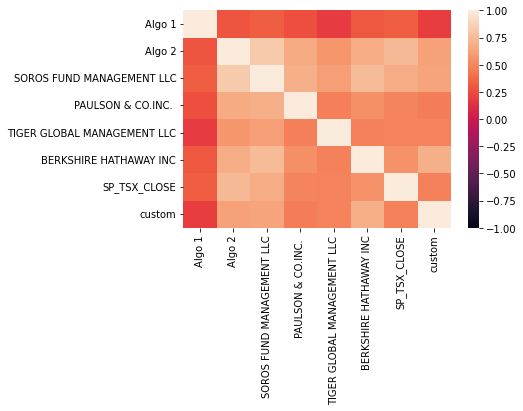

In [47]:
# Calculate and plot the correlation
custom_portfolio_correlation = combined_df.corr()
sns.heatmap(custom_portfolio_correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60 Day covariance custom vs. SP_TSX_CLOSE'}, xlabel='Date'>

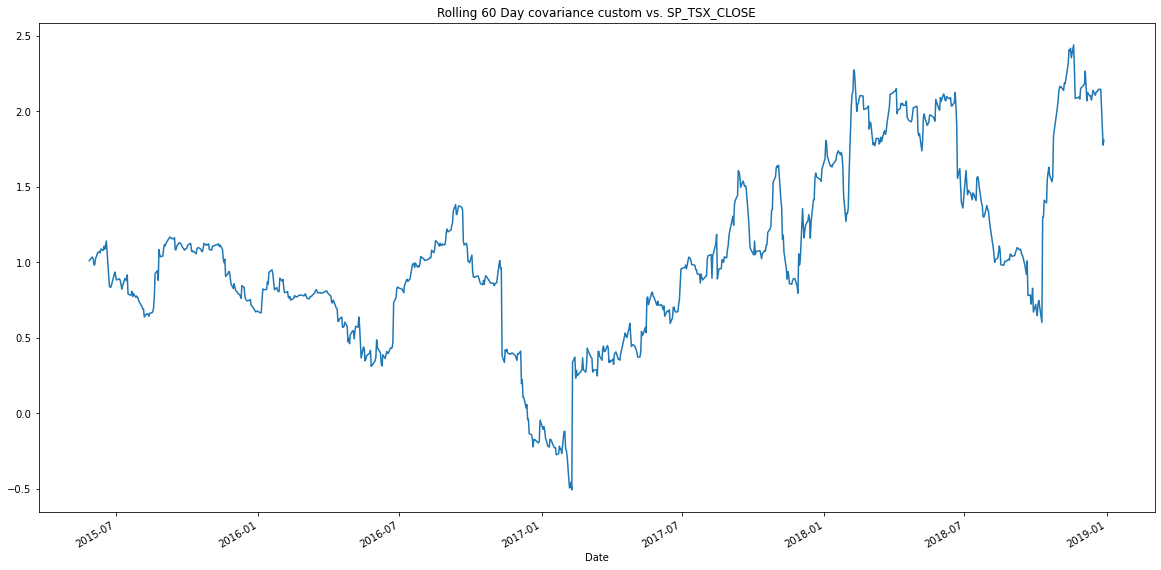

In [48]:
# Calculate and plot Beta
# Calculating Beta for 60 rolling days with nvidia against SP_TSX_60 using pandas
custom_covariance = combined_df['SP_TSX_CLOSE'].cov(combined_df['custom'])
custom_variance = combined_df['SP_TSX_CLOSE'].var()
custom_rolling_variance = combined_df['SP_TSX_CLOSE'].rolling(window=60).var()
custom_rolling_covariance = combined_df['custom'].rolling(window=60).cov(combined_df['SP_TSX_CLOSE'])
rolling_beta = custom_rolling_covariance / custom_rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60 Day covariance custom vs. SP_TSX_CLOSE')
#custom_rolling_covariance.plot(figsize=(20, 10), title='Rolling 60 Day covariance nvida vs. SP TSX')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Calculate Annualized Sharpe Ratios
custom_sharpe_ratios = ((combined_df.mean()) * 252) / (combined_df.std() * np.sqrt(252))
custom_sharpe_ratios

Algo 1                         1.272401
Algo 2                         0.025971
SOROS FUND MANAGEMENT LLC     -0.108415
PAULSON & CO.INC.             -0.856500
TIGER GLOBAL MANAGEMENT LLC   -0.121999
BERKSHIRE HATHAWAY INC         0.141211
SP_TSX_CLOSE                  -0.133638
custom                         1.200549
dtype: float64

<AxesSubplot:title={'center':'Custom Sharpe Ratios'}>

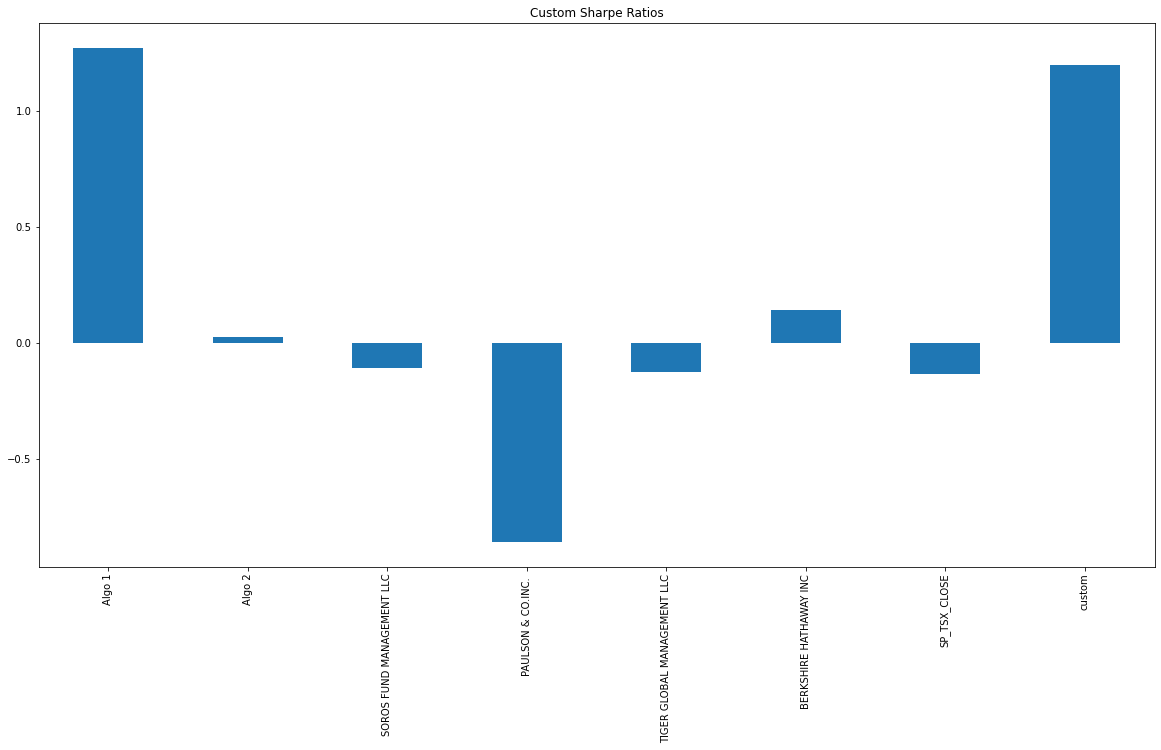

In [50]:
# Visualize the sharpe ratios as a bar plot
custom_sharpe_ratios.plot(figsize=(20,10), kind='bar', title = 'Custom Sharpe Ratios')

### How does your portfolio do?

Write your answer here!